In [94]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import math 
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt




In [95]:
data =pd.read_excel('input.xlsx')
data

,S.No.,H/T,ὠ(rps),D/T,r/R,z/H
0,1,0.6,5.0,0.5,0.000000,0.795000
1,2,0.6,5.0,0.5,0.042945,0.825000
2,3,0.6,5.0,0.5,0.089982,0.830000
3,4,0.6,5.0,0.5,0.124745,0.850000
4,5,0.6,5.0,0.5,0.169736,0.875000
...,...,...,...,...,...,...
773,774,1.3,15.0,0.6,0.774100,0.967359
774,775,1.3,15.0,0.6,0.821736,1.026706
775,776,1.3,15.0,0.6,0.885254,1.097922
776,777,1.3,15.0,0.6,0.960676,1.121661


In [108]:
dataframe = pd.DataFrame(data.iloc[:,0])
dataframe_output = pd.DataFrame(data.iloc[:,0])
input_cols = []
no_of_inputs = int(input('Input No of Inputs : '))
for i in range(0,no_of_inputs):
    input_cols.append(int(input('Column No : ')))
print('Selected Columns : ')
for i in range(0,no_of_inputs):
    print(data.columns[input_cols[i]])
output_col_no = int(input('Output Column No'))
dataframe_output.insert(1,data.columns[output_col_no],data.iloc[:,output_col_no],True)

print(data.columns[output_col_no])

Input No of Inputs : 3
Column No : 1
Column No : 2
Column No : 3
Selected Columns : 
H/T
ὠ(rps)
D/T
Output Column No5
z/H


In [109]:
for i in range(0,no_of_inputs):
    dataframe.insert(i+1,data.columns[input_cols[i]],data.iloc[:,input_cols[i]],True)
dataframe
print(dataframe_output)

     S.No.       z/H
0        1  0.795000
1        2  0.825000
2        3  0.830000
3        4  0.850000
4        5  0.875000
..     ...       ...
773    774  0.967359
774    775  1.026706
775    776  1.097922
776    777  1.121661
777    778  1.169140

[778 rows x 2 columns]


In [110]:
#dataframe_input = dataframe.iloc[:,[0,1,2,3,4]]
#dataframe_output = dataframe.iloc[:,[0,5]]
train_input, train_output = dataframe.loc[dataframe['S.No.'] % 3 !=0],dataframe_output.loc[dataframe_output['S.No.'] % 3 !=0]
test_input, test_output = dataframe.loc[dataframe_input['S.No.'] % 3 ==0],dataframe_output.loc[dataframe_output['S.No.'] % 3 ==0]
train_input, train_output = train_input.drop(columns=['S.No.']),train_output.drop(columns=['S.No.'])
test_input , test_output = test_input.drop(columns=['S.No.']), test_output.drop(columns=['S.No.'])
#train_input, train_output = train_input.iloc[:,[1,2,3,4]],train_output.iloc[:,[1]]
#test_input, test_output = test_input.iloc[:,[1,2,3,4]],test_output.iloc[:,[1]]

In [111]:
scaler = StandardScaler()
print(scaler.fit(train_input))
scaler.transform(train_input)
scaler.transform(test_input)

StandardScaler(copy=True, with_mean=True, with_std=True)


array([[-1.50402433, -1.29245148, -0.94926229],
       [-1.50402433, -1.29245148, -0.94926229],
       [-1.50402433, -1.29245148, -0.94926229],
       [-1.50402433, -1.29245148, -0.94926229],
       [-1.50402433, -1.29245148, -0.94926229],
       [-1.50402433, -0.77421406, -0.94926229],
       [-1.50402433, -0.77421406, -0.94926229],
       [-1.50402433, -0.77421406, -0.94926229],
       [-1.50402433, -0.77421406, -0.94926229],
       [-1.50402433, -0.77421406, -0.94926229],
       [-1.50402433, -0.25597663, -0.94926229],
       [-1.50402433, -0.25597663, -0.94926229],
       [-1.50402433, -0.25597663, -0.94926229],
       [-1.50402433, -0.25597663, -0.94926229],
       [-1.50402433, -0.25597663, -0.94926229],
       [-1.50402433,  0.25915758, -0.94926229],
       [-1.50402433,  0.25915758, -0.94926229],
       [-1.50402433,  0.25915758, -0.94926229],
       [-1.50402433,  0.25915758, -0.94926229],
       [-1.50402433,  0.25915758, -0.94926229],
       [-1.50402433,  0.25915758, -0.949

In [112]:
reg = LinearRegression().fit(train_input, train_output)
reg.score(train_input, train_output)

0.218042664427621

In [113]:
predicted = reg.predict(test_input)


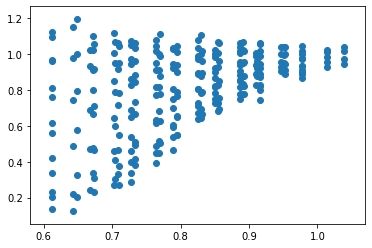

In [114]:
plt.scatter(predicted,test_output)
plt.show()

In [81]:
regr = MLPRegressor(activation='relu',hidden_layer_sizes=(1000,4), max_iter=1000).fit(train_input, train_output)

D:\pythonide\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [107]:
train_input

,H/T,ὠ(rps),D/T,H/T,ὠ(rps),D/T
0,0.6,5.0,0.5,0.6,5.0,0.5
1,0.6,5.0,0.5,0.6,5.0,0.5
3,0.6,5.0,0.5,0.6,5.0,0.5
4,0.6,5.0,0.5,0.6,5.0,0.5
6,0.6,5.0,0.5,0.6,5.0,0.5
...,...,...,...,...,...,...
771,1.3,15.0,0.6,1.3,15.0,0.6
772,1.3,15.0,0.6,1.3,15.0,0.6
774,1.3,15.0,0.6,1.3,15.0,0.6
775,1.3,15.0,0.6,1.3,15.0,0.6


In [82]:
predicted_nn = regr.predict(test_input)

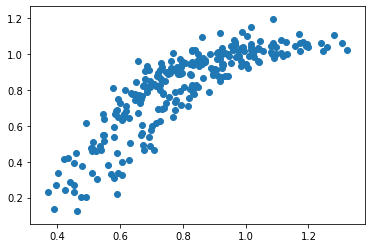

In [83]:
plt.scatter(predicted_nn,test_output)
plt.show()

In [84]:
from tensorflow import keras


In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.utils import plot_model

In [115]:
#input config
print('************* CONFIGURE NEURAL NETWORK ***************')
print('Basic Informations before configurations  : ')
print(' Available activations : relu, sigmoid, softmax, tanh ')

no_of_hidden_layers = 1
no_of_neurons_in_each_layer = []
activation_of_each_layer = []
no_of_hidden_layers = int(input('Input No of hidden layers: '))
for i in range(0,no_of_hidden_layers):
    temp = int(input('Input no of neurons in '+ str(i+1) + ' Hidden layer : '))
    no_of_neurons_in_each_layer.append(temp)
    activation_of_each_layer.append(input('Activation of '+ str(i+1) + ' Hidden layer : '))
print(no_of_hidden_layers)
print(no_of_neurons_in_each_layer)
print(activation_of_each_layer)

************* CONFIGURE NEURAL NETWORK ***************
Basic Informations before configurations  : 
 Available activations : relu, sigmoid, softmax, tanh 
Input No of hidden layers: 4
Input no of neurons in 1 Hidden layer : 5
Activation of 1 Hidden layer : relu
Input no of neurons in 2 Hidden layer : 4
Activation of 2 Hidden layer : relu
Input no of neurons in 3 Hidden layer : 3
Activation of 3 Hidden layer : relu
Input no of neurons in 4 Hidden layer : 2
Activation of 4 Hidden layer : relu
4
[5, 4, 3, 2]
['relu', 'relu', 'relu', 'relu']


In [116]:
input_shape = (no_of_inputs,)

model = Sequential()

model.add(InputLayer(input_shape=input_shape))

for i in range(0,no_of_hidden_layers):
    model.add(Dense(no_of_neurons_in_each_layer[i], activation=activation_of_each_layer[i]))
model.add(Dense(1, activation='linear'))
print(model.summary())



'''model.add(Dense(4, input_shape=input_shape, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))'''

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 5)                 20        
_________________________________________________________________
dense_27 (Dense)             (None, 4)                 24        
_________________________________________________________________
dense_28 (Dense)             (None, 3)                 15        
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 8         
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 3         
Total params: 70
Trainable params: 70
Non-trainable params: 0
_________________________________________________________________
None


"model.add(Dense(4, input_shape=input_shape, activation='relu'))\nmodel.add(Dense(10, activation='relu'))\nmodel.add(Dense(5, activation='relu'))\nmodel.add(Dense(1, activation='linear'))"

In [117]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
model.fit(train_input,train_output, epochs=100, batch_size=10, verbose=2, validation_split=0.3)

Epoch 1/100
37/37 - 0s - loss: 0.7956 - mean_squared_error: 0.6843 - val_loss: 0.7508 - val_mean_squared_error: 0.6245
Epoch 2/100
37/37 - 0s - loss: 0.7586 - mean_squared_error: 0.6271 - val_loss: 0.7138 - val_mean_squared_error: 0.5703
Epoch 3/100
37/37 - 0s - loss: 0.7216 - mean_squared_error: 0.5724 - val_loss: 0.6768 - val_mean_squared_error: 0.5189
Epoch 4/100
37/37 - 0s - loss: 0.6848 - mean_squared_error: 0.5205 - val_loss: 0.6400 - val_mean_squared_error: 0.4703
Epoch 5/100
37/37 - 0s - loss: 0.6481 - mean_squared_error: 0.4709 - val_loss: 0.6042 - val_mean_squared_error: 0.4245
Epoch 6/100
37/37 - 0s - loss: 0.6123 - mean_squared_error: 0.4255 - val_loss: 0.5698 - val_mean_squared_error: 0.3820
Epoch 7/100
37/37 - 0s - loss: 0.5776 - mean_squared_error: 0.3824 - val_loss: 0.5362 - val_mean_squared_error: 0.3428
Epoch 8/100
37/37 - 0s - loss: 0.5438 - mean_squared_error: 0.3426 - val_loss: 0.5039 - val_mean_squared_error: 0.3061
Epoch 9/100
37/37 - 0s - loss: 0.5113 - mean_squ

Epoch 70/100
37/37 - 0s - loss: 0.1719 - mean_squared_error: 0.0558 - val_loss: 0.1979 - val_mean_squared_error: 0.0691
Epoch 71/100
37/37 - 0s - loss: 0.1718 - mean_squared_error: 0.0561 - val_loss: 0.1981 - val_mean_squared_error: 0.0696
Epoch 72/100
37/37 - 0s - loss: 0.1719 - mean_squared_error: 0.0563 - val_loss: 0.1981 - val_mean_squared_error: 0.0697
Epoch 73/100
37/37 - 0s - loss: 0.1719 - mean_squared_error: 0.0564 - val_loss: 0.1981 - val_mean_squared_error: 0.0698
Epoch 74/100
37/37 - 0s - loss: 0.1719 - mean_squared_error: 0.0561 - val_loss: 0.1980 - val_mean_squared_error: 0.0695
Epoch 75/100
37/37 - 0s - loss: 0.1719 - mean_squared_error: 0.0562 - val_loss: 0.1981 - val_mean_squared_error: 0.0697
Epoch 76/100
37/37 - 0s - loss: 0.1719 - mean_squared_error: 0.0562 - val_loss: 0.1982 - val_mean_squared_error: 0.0698
Epoch 77/100
37/37 - 0s - loss: 0.1719 - mean_squared_error: 0.0562 - val_loss: 0.1981 - val_mean_squared_error: 0.0697
Epoch 78/100
37/37 - 0s - loss: 0.1719 -

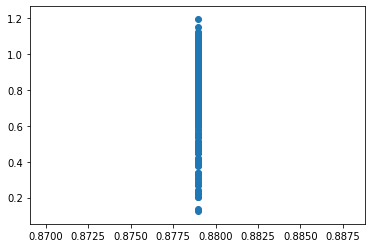

In [118]:
predicted_keras = model.predict(test_input)
predicted_keras
plt.scatter(predicted_keras,test_output)


In [119]:
model.get_weights()

[array([[-0.11697042,  0.45797628, -0.2843607 , -0.23172885, -0.27361053],
        [-0.2477603 ,  0.8332421 , -0.15407282, -0.37945062, -0.05048519],
        [ 0.45672876, -0.00859809,  0.2528805 , -0.22591591, -0.4065395 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.07135457,  0.5103427 , -0.5301877 ,  0.6254463 ],
        [ 0.14160848,  0.67094576,  0.0439502 ,  0.04428852],
        [-0.13891369, -0.22296643, -0.44926795,  0.52538836],
        [-0.30441904, -0.4715296 , -0.7928742 ,  0.57102776],
        [-0.7360672 , -0.54833627,  0.6942469 ,  0.68951523]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[-0.896366  , -0.11613566,  0.48434675],
        [ 0.27103662,  0.27183938, -0.535042  ],
        [ 0.20108926,  0.3168764 , -0.41985506],
        [-0.393102  ,  0.88309205, -0.16292018]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.6612797 ,  0.0766623 ],
        [-0.40919775, -0.866988  ],
        [